# Movie Industry EDA

### Let's import libraries we may need for our analysis and import the dataframes.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.ticker as ticker
%matplotlib inline


In [2]:
movie_dates_df = pd.read_csv('movie_release_dates.csv', index_col=0)
theaters_df = pd.read_csv('movie_theater_data.csv', index_col=0)
awards_df = pd.read_csv('movie_awards.csv', index_col=0)
actors_df = pd.read_csv('Actors_Table.csv')
directors_df = pd.read_csv('Directors_Table.csv')
imdb_base_df = pd.read_csv('IMDb_base.csv')
imdb_budgets_df = pd.read_csv('IMDb_budgets.csv')

Let's preview the head of each dataframe so we know what data we are working with.

In [3]:
movie_dates_df.head()

,movie,release_date,release_month,release_day,release_year
0,Metropolis,1927-03-06,March,Sunday,1927
1,"Dr. Mabuse, the Gambler",1927-08-08,August,Monday,1927
2,The Unknown,1927-06-03,June,Friday,1927
3,The Jazz Singer,1927-10-06,October,Thursday,1927
4,Chicago,1927-12-23,December,Friday,1927


In [4]:
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio
0,The Lion King,4802,2019,543638043,Disney
1,Avengers: Endgame,4662,2019,858373000,Disney
2,Spider-Man: Far from Home,4634,2019,390532085,Sony
3,Toy Story 4,4575,2019,434038008,Disney
4,It Chapter Two,4570,2019,211593228,Warner Bros.


In [5]:
actors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Robert Downey Jr.,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Chris Evans,"Apr 23, 2019",400000000,858373000,2797800564
2,Avengers: Endgame,2019,Mark Ruffalo,"Apr 23, 2019",400000000,858373000,2797800564
3,Avengers: Endgame,2019,Chris Hemsworth,"Apr 23, 2019",400000000,858373000,2797800564
4,Avatar,2009,Sam Worthington,"Dec 17, 2009",237000000,760507625,2788701337


In [6]:
directors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Joe Russo,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Anthony Russo,"Apr 23, 2019",400000000,858373000,2797800564
2,Avatar,2009,James Cameron,"Dec 17, 2009",237000000,760507625,2788701337
3,Black Panther,2018,Ryan Coogler,"Feb 13, 2018",200000000,700059566,1346103376
4,Avengers: Infinity War,2018,Joe Russo,"Apr 25, 2018",300000000,678815482,2048359754


In [7]:
imdb_base_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,PG-13,138,"Action, Adventure, Sci-Fi"
1,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama"
2,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy"
3,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi"
4,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi"


In [8]:
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395


# Question 1: What are the most profitable movies and how much should you spend?

Let's calculate profit and profit margin for each of the movies in `imdb_budgets_df` dataframe and add those as new columns.  

Here, we'll define profit as `Worldwide Gross`-`Production Budget`.

It will also be beneficial in our analysis to have uniformity when discussing movie budgets and profits so we will also create an adjusted budget and adjusted profit column to account for inflation.

We will use an average inflation rate of 3.22%.

In [9]:
imdb_budgets_df['Profit'] = imdb_budgets_df['Worldwide Gross'] - imdb_budgets_df['Production Budget']

imdb_budgets_df['Profit_Margin'] = (imdb_budgets_df['Worldwide Gross'] - 
                                    imdb_budgets_df['Production Budget'])/imdb_budgets_df['Worldwide Gross']

In [10]:
imdb_budgets_df['Adjusted_Budget'] = ((((2020-imdb_budgets_df['Year'])*.0322)+1)*
                                      imdb_budgets_df['Production Budget'])
imdb_budgets_df['Adjusted_Profit'] = (((2020-imdb_budgets_df['Year'])*.0322)+1)*imdb_budgets_df['Profit']
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,412880000.0,2.475010e+09
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,320945400.0,3.455514e+09
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.851423,212880000.0,1.219912e+09
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.853541,319320000.0,1.860954e+09
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,348120000.0,3.495488e+09


For this question we are specifically looking at profitable movies.  We'll create a separate dataframe called `profitable_movies_df` where the `Profit` column is greater than 0. We will then sort by `Adjusted_Profit` to rank movies in terms of profitability.

In [11]:
profitable_movies_df = imdb_budgets_df.loc[imdb_budgets_df['Profit'] > 0]
profitable_ranked_df = profitable_movies_df.sort_values(by=['Adjusted_Profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True)
profitable_ranked_df.head()

,index,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,348120000.0,3.495488e+09
1,1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,320945400.0,3.455514e+09
2,0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,412880000.0,2.475010e+09
3,3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.853541,319320000.0,1.860954e+09
4,28,Jurassic Park,1993,8.1,PG-13,127,"Action, Adventure, Sci-Fi","Jun 11, 1993",63000000,402523348,1045627627,982627627,0.939749,117772200.0,1.836924e+09


Now that we've got our profitable movie data, let's take a look at adjusted profit versus adjusted budget for each of the movies in the dataframe. 

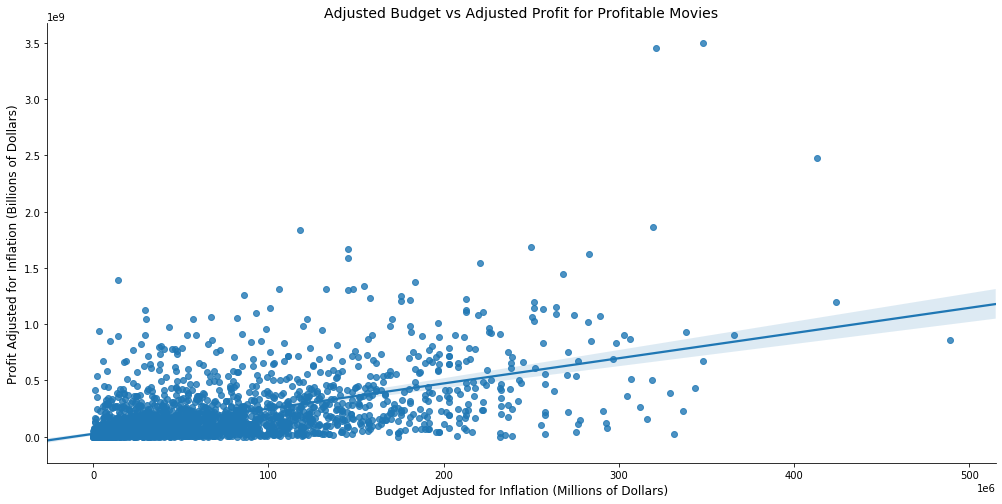

In [12]:
sns.lmplot(x='Adjusted_Budget', y='Adjusted_Profit', data=profitable_ranked_df, height=7, aspect=2)
plt.xlabel('Budget Adjusted for Inflation (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Adjusted for Inflation (Billions of Dollars)', fontsize=12)
plt.title('Adjusted Budget vs Adjusted Profit for Profitable Movies', fontsize=14);

This scatter plot is helpful in beginning to understand how much money should be budgeted for a movie.  The positive trend line indicates that an increase in the budget will result in an increase in profit.

Let's take a look at the most successful movies so that we can get a better idea of what the budget should be.

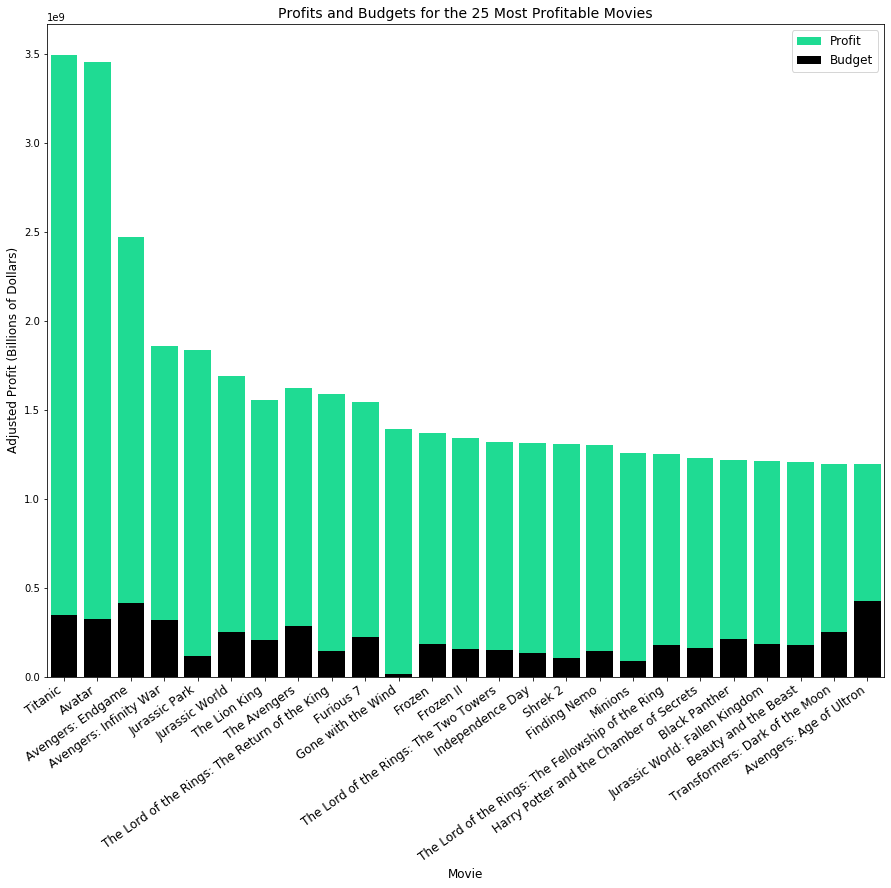

In [13]:
plt.figure(figsize=(15,12))
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Profit'], 
            color='mediumspringgreen', label='Profit', ci=None)
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Budget'], 
            color='black', label='Budget', ci=None)
plt.xlabel('Movie', fontsize=12)
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontsize=14)
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12);

In [14]:
profitable_movies_df['Adjusted_Budget'].describe()

count    2.841000e+03
mean     6.059149e+07
std      6.318726e+07
min      1.060640e+04
25%      1.644900e+07
50%      3.867600e+07
75%      8.220000e+07
max      4.888342e+08
Name: Adjusted_Budget, dtype: float64

In [15]:
profitable_movies_df.loc[0:24, 'Adjusted_Budget'].describe()

count    2.500000e+01
mean     2.427778e+08
std      8.069887e+07
min      1.060640e+08
25%      1.806350e+08
50%      2.257600e+08
75%      2.829600e+08
max      4.237650e+08
Name: Adjusted_Budget, dtype: float64

In [16]:
profitable_movies_df['Profit_Margin'].describe()

count    2841.000000
mean        0.621164
std         0.240697
min         0.000265
25%         0.465071
50%         0.671252
75%         0.809792
max         0.997599
Name: Profit_Margin, dtype: float64

In [17]:
profitable_movies_df.loc[0:24, 'Profit_Margin'].describe()

count    25.000000
mean      0.846165
std       0.046107
min       0.738557
25%       0.813675
50%       0.849688
75%       0.871288
max       0.925154
Name: Profit_Margin, dtype: float64

In [18]:
len(profitable_ranked_df.loc[profitable_ranked_df['Profit_Margin'] > 0.5])

2043

Clearly the most successful 25 movies have both incredible profits and profit margins. Titanic (1997), Avatar, and Avengers: Endgame are the most successful movies in terms of sheer profit. 

So how do we know what to spend? We need to think about what sort of profit margin we want to see. 2043 out of 2841 total profitable movies have a profit margin over 50%. That's good news as it indicates that we can be more aggressive in choosing a threshold for the profit margin. The top 25 movies have a median profit margin of 84.9% with a median budget of \\$225,760,000. When looking at all of our profitable movies, the profit margin drops significantly to 67.1\% and the budget drops significantly to \\$38,676,000. We use the median to describe our data here as the mean will be skewed by outlier data.

Let's filter the data with a profit margin of  75% or greater and a budget greater than $38,676,000.

In [19]:
filtered_df = profitable_ranked_df.loc[(profitable_ranked_df['Profit_Margin'] >= 0.75) & 
                         (profitable_ranked_df['Adjusted_Budget'] > 38676000)]
len(filtered_df)

374

After filtering we still have 374 movies left upon which to draw conclusions.

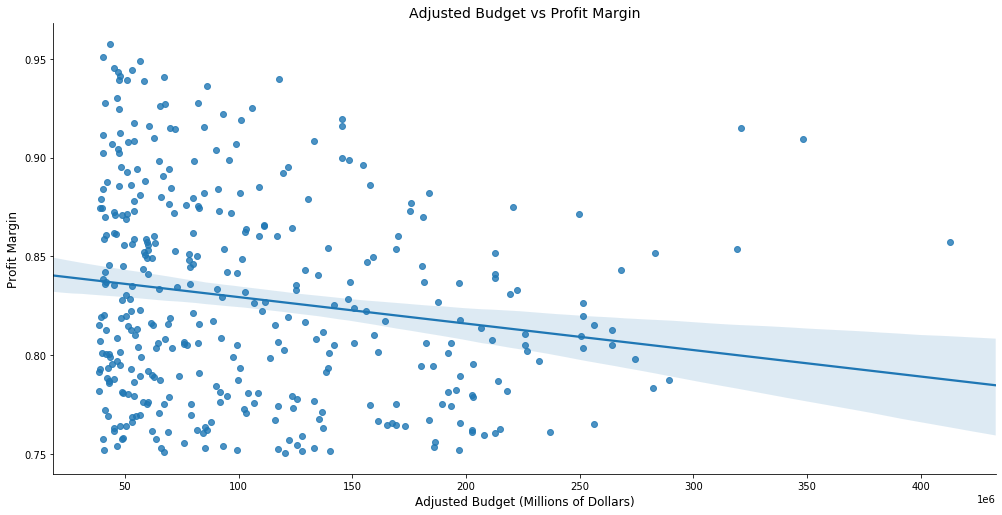

In [20]:
sns.lmplot(x='Adjusted_Budget', y='Profit_Margin', data=filtered_df, height=7, aspect=2)
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Adjusted Budget vs Profit Margin', fontsize=14);

In [21]:
filtered_df.describe()

,index,Year,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,374.000000,374.000000,374.000000,374.000000,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,374.000000,3.740000e+02,3.740000e+02
mean,391.529412,2004.965241,7.012032,118.601604,7.781418e+07,1.933788e+08,4.849949e+08,4.071807e+08,0.828523,1.058585e+08,5.628791e+08
std,378.199265,10.811640,0.902894,24.020748,5.757015e+07,1.270890e+08,3.776903e+08,3.299941e+08,0.052470,6.627224e+07,4.131143e+08
min,0.000000,1956.000000,3.300000,79.000000,1.350000e+07,1.901988e+07,6.999538e+07,5.499538e+07,0.750282,3.868500e+07,1.232098e+08
25%,111.250000,1998.000000,6.400000,100.000000,3.500000e+07,1.069483e+08,2.172884e+08,1.763544e+08,0.783548,5.347110e+07,2.748616e+08
50%,279.500000,2007.000000,7.000000,116.000000,5.500000e+07,1.628020e+08,3.509376e+08,2.990630e+08,0.819296,8.224930e+07,4.492299e+08
75%,550.500000,2014.000000,7.700000,131.750000,1.000000e+08,2.420814e+08,6.360843e+08,5.139793e+08,0.869551,1.396546e+08,7.195911e+08
max,2424.000000,2020.000000,9.000000,228.000000,4.000000e+08,8.583730e+08,2.797801e+09,2.551701e+09,0.957496,4.128800e+08,3.495488e+09


We examine the data in a scatter plot again to see if we can determine trends. Our data is much more spread out when comparing profit margin and budget.  The trend line in this plot is negative which cautions against spending too much money as we may potentially hurt our profit margin.  Looking at the filtered data, we have a median budget of $82,249,300 and a median profit margin of 81.9%.  

**Qustion 1 Conclusion**: We recommend that Microsoft should budget approximately $82,250,000 to make a movie. This should correlate with a profit margin above 80%. 

# Question 5: How much should you spend on a movie to win an Oscar?

In order to answer this question we'll first need to join the `imdb_budgets_df` dataframe and the `awards_df` dataframe.  As there may be movies with duplicate titles, we set the indices of both dataframes to the movie name and year so that matching data is correctly joined.

In [22]:
imdb_budgets_df.set_index(['Movie','Year'], inplace=True)
awards_df.set_index(['film_name', 'film_year'], inplace=True)

In [23]:
budgets_and_awards = imdb_budgets_df.join(awards_df, how='inner', on=['Movie', 'Year'])
budgets_and_awards.head()

,,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,awards_won,awards_nominated,win_rate
Movie,Year,,,,,,,,,,,,,,,
Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,320945400.0,3.455514e+09,3,9,0.333
Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.851423,212880000.0,1.219912e+09,3,7,0.429
Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,348120000.0,3.495488e+09,11,14,0.786
The Dark Knight,2008,9.0,PG-13,152,"Action, Crime, Drama","Jul 11, 2008",185000000,533720947,1000742751,815742751,0.815137,256484000.0,1.130946e+09,2,8,0.250
Toy Story 4,2019,7.8,G,100,"Animation, Adventure, Comedy","Jun 20, 2019",200000000,434038008,1073394813,873394813,0.813675,206440000.0,9.015181e+08,1,2,0.500


We've successfully joined the two dataframes.  Let's filter the dataframe to include movies where the profit is greater than 0.

In [24]:
nominated_movies_df = budgets_and_awards.loc[budgets_and_awards['Profit'] > 0]

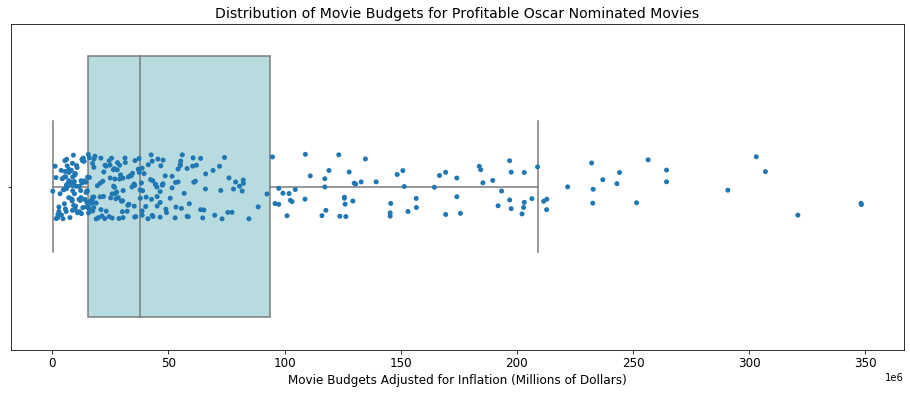

In [25]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Adjusted_Budget', data=nominated_movies_df, showfliers=False, color='powderblue')
sns.stripplot(x='Adjusted_Budget', data=nominated_movies_df)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xticks(fontsize=12)
plt.xlabel('Movie Budgets Adjusted for Inflation (Millions of Dollars)', fontsize=12);
plt.title('Distribution of Movie Budgets for Profitable Oscar Nominated Movies', fontsize=14);


In [26]:
nominated_movies_df['Adjusted_Budget'].describe()

count    3.310000e+02
mean     6.647934e+07
std      7.249719e+07
min      2.127900e+05
25%      1.542566e+07
50%      3.781650e+07
75%      9.359800e+07
max      3.483000e+08
Name: Adjusted_Budget, dtype: float64

By looking at the distribution of movie budgets we see that the majority of data is clustered in an area below $100 million dollars.

We need to take this a step further as the above distribution includes movies that were nominated and won awards as well as movies that did not win awards. In order to properly answer our question we must win an Oscar.

We could filter by win rate and exclude those movies that did not win anything, however our data would still include movies that were nominated in a single category and won. This would skew the win rate as there would be several movies with a win rate of 100%.  Let's take a look at the mean and median win rate to establish a threshold for award nominations.

In [27]:
nominated_movies_df['win_rate'].describe()
#Let's be conservative for win rate and use the median win rate
#That means we would need to be nominated for at least 3 awards in order to win 1 award.

count    330.000000
mean       0.448203
std        0.279846
min        0.000000
25%        0.250000
50%        0.392500
75%        0.600000
max        1.000000
Name: win_rate, dtype: float64

The mean win rate is 44.8% but as we mentioned is skewed by those movies with only 1 nomination. The median win rate is 39.2% which should be less skewed by the data and is a more conservative number. Using the median win rate of 39.2%, our movie would need to be nominated for at least 3 awards in order to get at least one win. 3 nominations will be the cutoff.

263


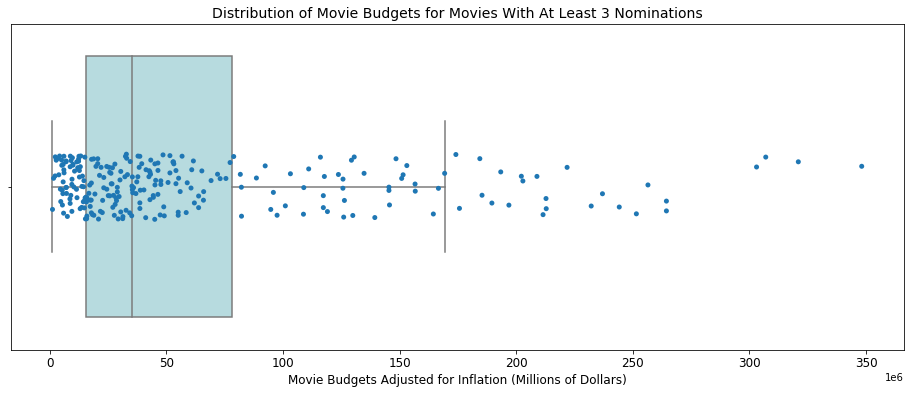

In [28]:
nominated_over_three = nominated_movies_df.loc[nominated_movies_df['awards_nominated'] >= 3]
print(len(nominated_over_three))
plt.figure(figsize=(16,6))
sns.boxplot(x=nominated_over_three['Adjusted_Budget'], showfliers=False, color='powderblue')
sns.stripplot(x='Adjusted_Budget', data=nominated_over_three)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xticks(fontsize=12)
plt.xlabel('Movie Budgets Adjusted for Inflation (Millions of Dollars)', fontsize=12)
plt.title('Distribution of Movie Budgets for Movies With At Least 3 Nominations', fontsize=14);

In [29]:
nominated_over_three['Adjusted_Budget'].describe()

count    2.630000e+02
mean     6.240465e+07
std      6.912684e+07
min      1.224990e+06
25%      1.548290e+07
50%      3.546500e+07
75%      7.813200e+07
max      3.481200e+08
Name: Adjusted_Budget, dtype: float64

It's important to note that the box plot of the `nominated_over_three` dataframe has shrunk! This means that our filter has decreased our interquartile range for the movie budget.  Since this range is smaller there should be less variability in the middle of the data set. Since we have adjusted budgets that are extreme outliers, it is best to use the median as the primary measure of central tendency. The median adjusted budget for this data is \\$35,465,000. 
 
**Question 5 Conclusion**: Microsoft should spend at least $35,465,000 in order to make an Oscar-winning movie.

*It is also worth noting that the 75th percentile of the adjusted budget for movies with at least three nominations is $78,132,000. This is close to our recommendation of a \\$82 million budget for a profitable movie with a profit margin of approximately 80%.*

# Question 8: Which studio should you choose based off of dollars per theater and win rate?

We need to add a column to the `theaters_df` dataframe to calculate the money grossed per theater for a given movie.  Then we can group by studio.

In [30]:
theaters_df['dollars_per_theater'] = theaters_df['total_dom_gross($)'] / theaters_df['max_theaters']
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio,dollars_per_theater
0,The Lion King,4802,2019,543638043,Disney,113210.754477
1,Avengers: Endgame,4662,2019,858373000,Disney,184121.192621
2,Spider-Man: Far from Home,4634,2019,390532085,Sony,84275.374407
3,Toy Story 4,4575,2019,434038008,Disney,94871.695738
4,It Chapter Two,4570,2019,211593228,Warner Bros.,46300.487527


In [31]:
#Let's see what the average is for max number of theaters and for gross per theater for each studio
average_theaters = theaters_df.groupby('studio').mean()
average_theaters_ranked = average_theaters.sort_values(by=['studio'],ascending=False)
average_theaters_ranked.reset_index(inplace=True)
average_theaters

,max_theaters,year,total_dom_gross($),dollars_per_theater
studio,,,,
Disney,3682.319728,2010.591837,2.026179e+08,51856.141904
DreamWorks Distribution,3408.263158,2002.947368,1.181983e+08,33102.055326
Lionsgate,3356.244898,2014.469388,9.526829e+07,26485.343053
Metro-Goldwyn-Mayer (MGM),3259.142857,2004.000000,7.843758e+07,23829.208308
New Line Cinema,3410.571429,2001.857143,2.497181e+08,72518.242699
Paramount Pictures,3466.705357,2010.714286,1.086149e+08,30508.472763
Sony,3478.355556,2010.562963,1.166779e+08,32626.668858
TriStar Pictures,3146.000000,2014.000000,8.070322e+07,25546.753029
Twentieth Century Fox,3493.975758,2011.212121,1.110098e+08,31119.138124


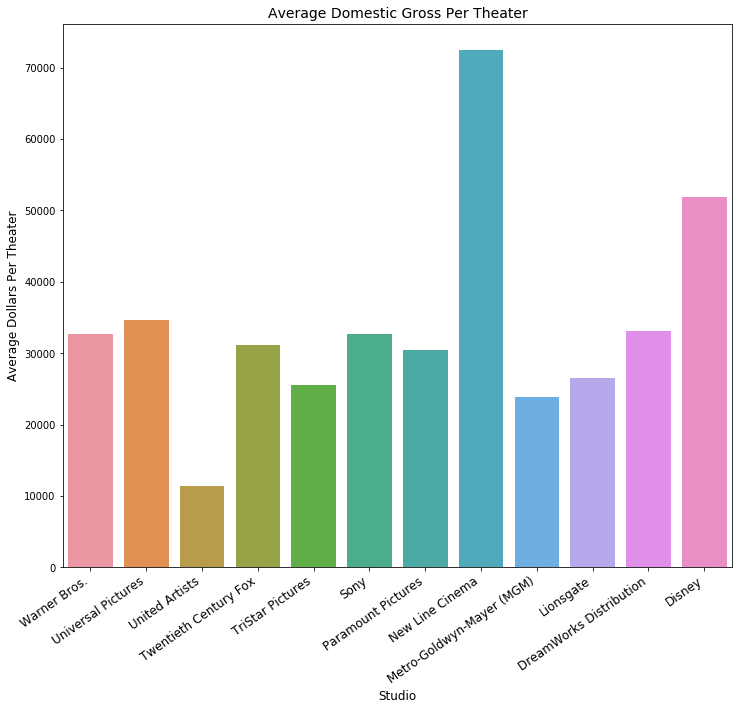

In [43]:
plt.figure(figsize=(12,10))
sns.barplot(x='studio', y='dollars_per_theater', data=average_theaters_ranked)
plt.xlabel('Studio', fontsize=12)
plt.title("Average Domestic Gross Per Theater", fontsize=14);
plt.ylabel('Average Dollars Per Theater', fontsize=12);
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12);

In the bar plot above, Disney and New Line Cinema stand out. We need to double check that there are an appropriate number of movies by each of these studios before jumping to conclusions.

In [33]:
theaters_df['studio'].value_counts()

Warner Bros.                 208
Twentieth Century Fox        165
Disney                       147
Universal Pictures           136
Sony                         135
Paramount Pictures           112
Lionsgate                     49
DreamWorks Distribution       19
Metro-Goldwyn-Mayer (MGM)     14
TriStar Pictures               7
New Line Cinema                7
United Artists                 1
Name: studio, dtype: int64

We can see that New Line Cinema only has 7 movies in this dataframe which means that their average domestic gross per theater is going to be skewed.  Disney is certainly still a possibility and we should also consider Warner Bros. and Twentieth Century Fox.

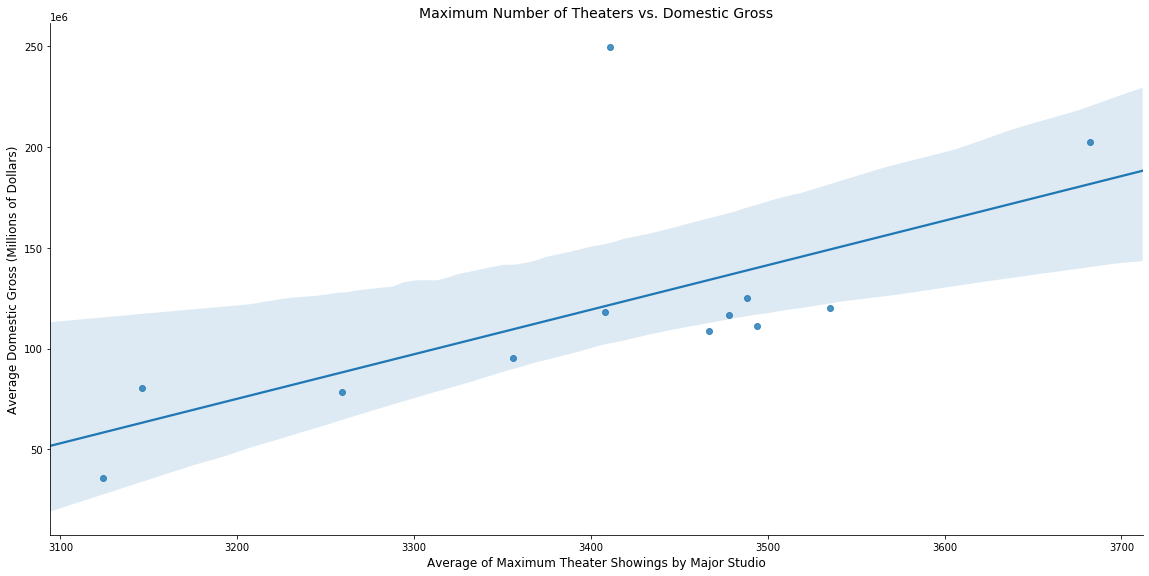

In [34]:
sns.lmplot(x='max_theaters', y='total_dom_gross($)', data=average_theaters, height=8, aspect=2)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.xlabel('Average of Maximum Theater Showings by Major Studio', fontsize=12)
plt.ylabel('Average Domestic Gross (Millions of Dollars)', fontsize=12)
plt.title('Maximum Number of Theaters vs. Domestic Gross', fontsize=14);

The scatter plot shows a positive trend between the average number of theaters and the average domestic gross. The sole outlier is New Line Cinemas due to how few movies they are associated with in our dataframe. Disney is farthest to the right and above the trend line further proving that they should be a strong consideration.

We'll join the theater and awards dataframes so that we can see which studios have the best win rate at the Oscars.

In [35]:
theaters_df.set_index(['title', 'year'], inplace=True)

In [36]:
theaters_and_awards = theaters_df.join(awards_df, how='inner', on=['title', 'year'])

In [37]:
theaters_and_awards.groupby('studio').count()

,max_theaters,total_dom_gross($),dollars_per_theater,awards_won,awards_nominated,win_rate
studio,,,,,,
Disney,22,22,22,22,22,22
DreamWorks Distribution,4,4,4,4,4,4
New Line Cinema,2,2,2,2,2,2
Paramount Pictures,7,7,7,7,7,7
Sony,6,6,6,6,6,6
Twentieth Century Fox,4,4,4,4,4,4
Universal Pictures,6,6,6,6,6,6
Warner Bros.,15,15,15,15,15,15


In [38]:
theaters_and_awards.groupby('studio').mean()

,max_theaters,total_dom_gross($),dollars_per_theater,awards_won,awards_nominated,win_rate
studio,,,,,,
Disney,3818.727273,3.052172e+08,78797.606486,1.363636,3.000000,0.599045
DreamWorks Distribution,3444.250000,1.532236e+08,44447.628709,2.000000,4.250000,0.604250
New Line Cinema,3662.500000,3.584086e+08,97814.750337,6.500000,8.500000,0.666500
Paramount Pictures,3564.857143,1.408354e+08,38930.819127,1.000000,3.714286,0.451143
Sony,3653.666667,2.378423e+08,64720.228079,1.166667,3.166667,0.538833
Twentieth Century Fox,3501.750000,1.368749e+08,38404.788199,2.250000,6.000000,0.425000
Universal Pictures,3338.833333,1.493447e+08,44970.820343,1.333333,3.333333,0.505500
Warner Bros.,3831.600000,2.340559e+08,60023.038417,2.666667,5.866667,0.557400


Unfortunately, the joining of the dataframes only left us with 66 common movies. We would prefer to have more data to be more confident in establishing trends. We will consider the average number of theaters and average win rate to make a determination.  Disney is associated with 22 movies in our joined dataframe while Warner Bros. is associated with 15.  Warner. Bros does have a higher average for the number of theaters, however Disney has a noticeable $18,000 advantage in average domestic gross per theater. Disney also has the higher win rate for Oscars at nearly 60%.

**Question 8 Conclusion**: Microsoft should partner with Disney based upon domestic gross per theater and win rate.